<a href="https://colab.research.google.com/github/siddharthprakash1/BLINDAUCTION/blob/main/Learning_Ann_and_Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install tensorflow
!pip install matplotlib
!pip install numpy
!pip install pandas


In [48]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [49]:
(X_train, y_train), (X_test, y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

1.   Training sample is 50,000
2.   Sample is 32x32 image
3.   3 is for rgb channel



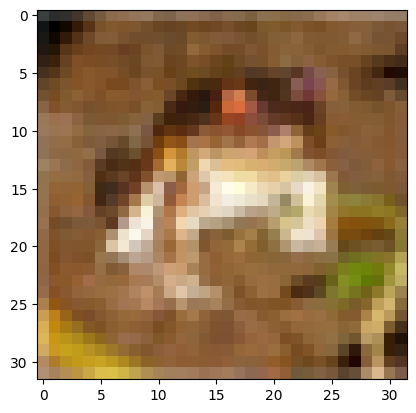

In [50]:
plt.imshow(X_train[0])

Its a frog

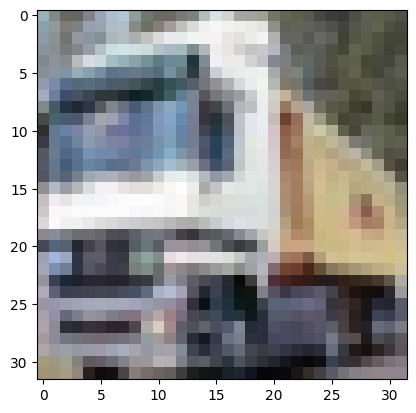

In [51]:
plt.imshow(X_train[1])

its a truck

In [52]:
 y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

here 6 is frog 9 is ship each number is associated to a label in the dataset

In [53]:
 y_train=y_train.reshape(-1,)
 y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

so here we flattend the array to a one dimensional thing

In [54]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [55]:
classes[9]

'truck'

In [56]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

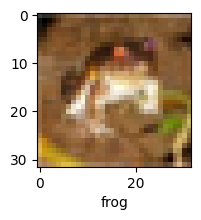

In [57]:
plot_sample(X_train, y_train,0)

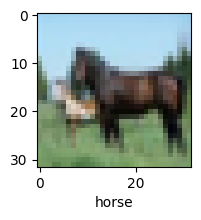

In [58]:
plot_sample(X_train, y_train,12)

Now we need to normalize the dataset so we divide the dataset w 255 coz its rgb


In [59]:
X_train=X_train/255
X_test=X_test/255

In [60]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss="sparse_categorical_crossentropy",
            metrics=['accuracy'])

ann.fit(X_train ,y_train ,epochs=5)


Epoch 1/5
1563/1563 [==============================] - 166s 105ms/step - loss: 1.8130 - accuracy: 0.3521
Epoch 2/5
1563/1563 [==============================] - 154s 99ms/step - loss: 1.6226 - accuracy: 0.4280
Epoch 3/5
1563/1563 [==============================] - 152s 97ms/step - loss: 1.5406 - accuracy: 0.4570
Epoch 4/5
1563/1563 [==============================] - 160s 102ms/step - loss: 1.4811 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 154s 98ms/step - loss: 1.4299 - accuracy: 0.4973



*   so here we have the 32x32x3 image as the input then there are 2 dense layers each having 3000 neurons and after that last layer has 10 neurons.
Loss fn ke liye we have that shit up and optimizer is sgd
*   here the losss fn is sparse_categorical_crossentropy coz we get the y output as number and in normal categorical crossentropy its a one hot encoded value in an array so we are not using that



In [61]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 10s 32ms/step - loss: 1.5632 - accuracy: 0.4510


[1.5631669759750366, 0.45100000500679016]

In [62]:
from sklearn.metrics import confusion_matrix ,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("clasification Report: \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 10s 32ms/step
clasification Report: 
               precision    recall  f1-score   support

           0       0.66      0.40      0.50      1000
           1       0.74      0.46      0.57      1000
           2       0.48      0.17      0.25      1000
           3       0.34      0.31      0.32      1000
           4       0.51      0.24      0.33      1000
           5       0.42      0.33      0.37      1000
           6       0.40      0.74      0.52      1000
           7       0.30      0.81      0.43      1000
           8       0.70      0.55      0.62      1000
           9       0.57      0.51      0.54      1000

    accuracy                           0.45     10000
   macro avg       0.51      0.45      0.44     10000
weighted avg       0.51      0.45      0.44     10000



here 0,1.. is frog cat truck plane etc

now we use cnn to improve this value

In [63]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    #dense layer
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')#will give u normalized probablity value
])

In [64]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [67]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0775 - accuracy: 0.6231
Epoch 2/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0040 - accuracy: 0.6494
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9520 - accuracy: 0.6656
Epoch 4/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9081 - accuracy: 0.6819
Epoch 5/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8706 - accuracy: 0.6945
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8405 - accuracy: 0.7052
Epoch 7/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8099 - accuracy: 0.7171
Epoch 8/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.7764 - accuracy: 0.7272
Epoch 9/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7450 - accuracy: 0.7398
Epoch 10/10
1563/1563 [==============================] - 52s 33m

In [68]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 15ms/step - loss: 0.9338 - accuracy: 0.6847


[0.9338337182998657, 0.6847000122070312]

In [71]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

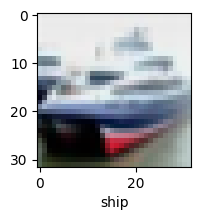

In [72]:
plot_sample(X_test,y_test,1)

In [73]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 6s 18ms/step


array([[4.9654592e-04, 1.0024608e-05, 6.0242484e-04, 8.3652133e-01,
        1.7174380e-05, 1.5557028e-01, 1.5307372e-03, 9.9218356e-05,
        5.1499242e-03, 2.2733020e-06],
       [2.8318667e-03, 3.6852136e-02, 1.9644706e-07, 3.2754625e-07,
        5.0243102e-08, 5.7689331e-08, 5.7876029e-08, 8.5588709e-09,
        9.6022630e-01, 8.8954999e-05],
       [2.0625059e-02, 9.8603917e-03, 9.9223724e-04, 3.6196483e-03,
        9.3064480e-04, 4.8159584e-03, 4.8741821e-04, 1.1669841e-03,
        9.5330572e-01, 4.1959635e-03],
       [4.2136371e-01, 3.8739820e-03, 1.4093839e-02, 1.2518975e-03,
        5.2146232e-03, 1.4357970e-04, 1.5558593e-04, 6.4767504e-05,
        5.5354911e-01, 2.8891565e-04],
       [1.3563420e-05, 7.2538751e-05, 2.1473384e-02, 3.6614262e-02,
        5.1314849e-01, 3.0072929e-02, 3.9855134e-01, 5.0393690e-05,
        2.8929624e-06, 2.2114334e-07]], dtype=float32)

In [74]:
y_classes=[np.argmax(element)for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [75]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

so here in test we can see that 3,8,8 is matching with the test class but not next 8 and 0 still the accuracy is high tho


In [76]:
classes


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

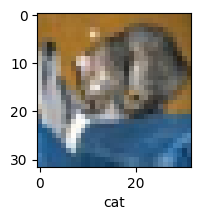

In [78]:
plot_sample(X_test, y_test,0)

In [77]:
classes[y_classes[0]]

'cat'

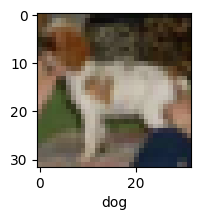

In [79]:
plot_sample(X_test, y_test,12)

In [80]:
classes[y_classes[12]]

'cat'

so here even though in the picture is a dog the model predicts it to be a cat which is ohk

In [82]:

print("clasification Report: \n",classification_report(y_test,y_classes))

clasification Report: 
               precision    recall  f1-score   support

           0       0.75      0.66      0.70      1000
           1       0.82      0.80      0.81      1000
           2       0.62      0.55      0.58      1000
           3       0.54      0.41      0.46      1000
           4       0.64      0.63      0.63      1000
           5       0.51      0.68      0.58      1000
           6       0.79      0.75      0.77      1000
           7       0.67      0.78      0.72      1000
           8       0.76      0.82      0.79      1000
           9       0.80      0.76      0.78      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

